In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Text Pre-processing
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
import spacy
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Feature Extstopwords.zipraction
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Model Validation
from sklearn.model_selection import train_test_split

#Model Building
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Model Accuracy
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report

# To save & load models
from pickle import dump
from pickle import load

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load dataset
data=pd.read_excel('/content/hotel_reviews (2).xlsx')
data.head()

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN


In [ ]:
data.drop(columns={'@'},inplace=True)
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# Descriptive Statistics

In [ ]:
data.shape

(20491, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [ ]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Perform EDA

In [ ]:
#Missing Value
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
#Duplicate Value
data[data.duplicated()]

,Review,Rating


In [ ]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Text(0, 0.5, 'Count')

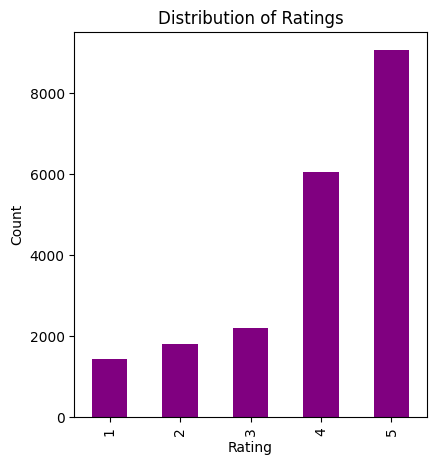

In [ ]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Rating'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
rating_counts = data['Rating'].value_counts()

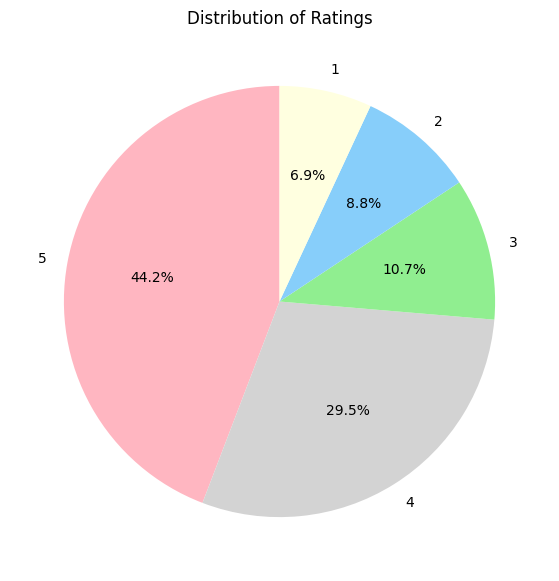

In [ ]:
# Plotting a pie chart for ratings
plt.figure(figsize=(15, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['lightpink', 'lightgrey', 'lightgreen', 'lightskyblue', 'lightyellow'])

plt.title('Distribution of Ratings')
plt.show()

### Observation:
 + Here,as we see 4 and 5 rating are contributing nearly 75% which shows biased towards positive side.
      

In [ ]:
def no_of_words(text):
  words=text.split()
  word_count=len(words)
  return word_count

In [ ]:
data['word_count']=data['Review'].apply(no_of_words)

In [ ]:
#Creating a new column 'Length' that will contain the length of the string 'Review' column
data['Length']=data['Review'].apply(len)

In [ ]:
data.head()

,Review,Rating,word_count,Length
0,nice hotel expensive parking got good deal sta...,4,87,593
1,ok nothing special charge diamond member hilto...,2,250,1689
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427
3,"unique, great stay, wonderful time hotel monac...",5,89,600
4,"great stay great stay, went seahawk game aweso...",5,191,1281


In [ ]:
import plotly.express as px
px.histogram(data,data['Length'],color='Rating',color_discrete_sequence=['lightpink', 'lightgrey', 'lightgreen', 'lightskyblue', 'lightyellow'],title="Review Length Distributions")

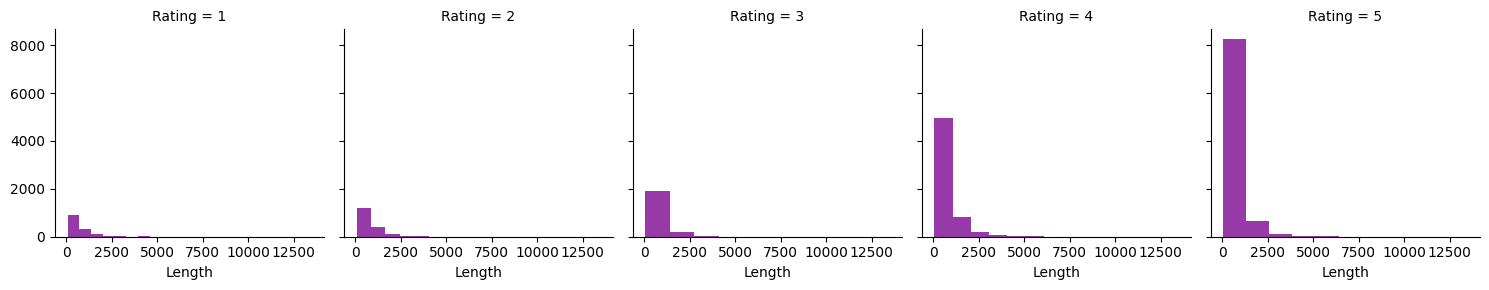

In [ ]:
g = sns.FacetGrid(data=data, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

In [ ]:
booking_sites = data['Review'].str.extract(r'(\w+\.com)')[0].value_counts()
booking_sites

hotels.com          41
tripadvisor.com     33
hotmail.com         18
lastminute.com      14
yahoo.com           13
                    ..
light.com            1
hawaii.com           1
aavacations.com      1
ilikai.com           1
dlkinsurance.com     1
Name: 0, Length: 143, dtype: int64

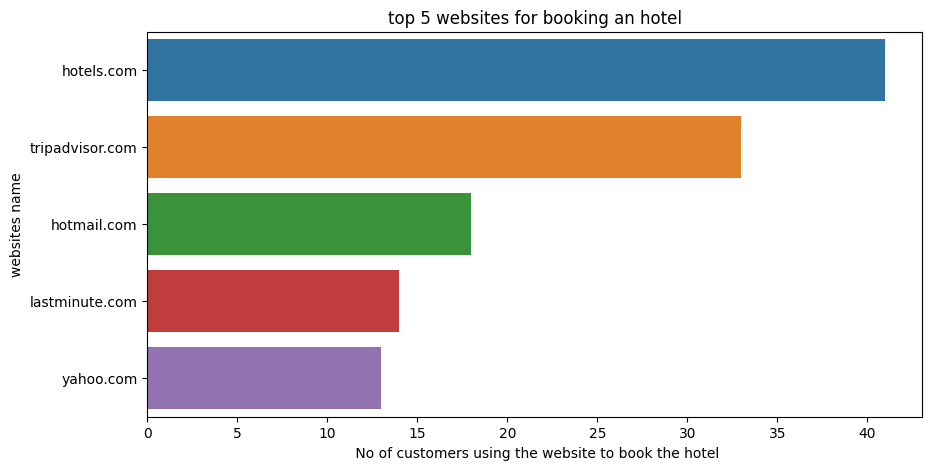

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y=booking_sites.head(5).index, x=booking_sites.head(5))
plt.title('top 5 websites for booking an hotel')
plt.xlabel(' No of customers using the website to book the hotel')
plt.ylabel('websites name')
plt.show()

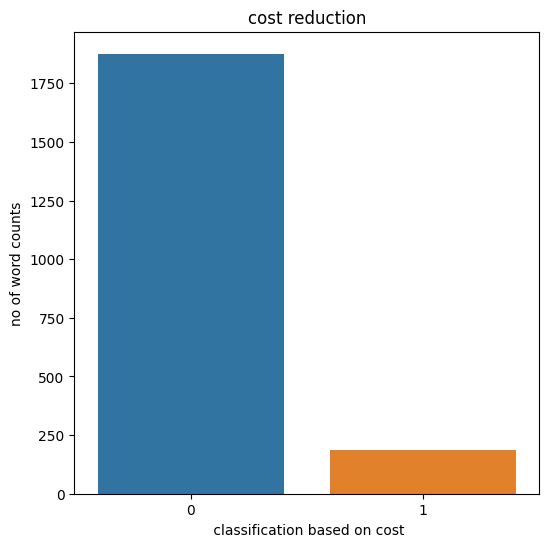

In [ ]:
Expensive=data['Review'].str.extract(r'(expensive)')[0].value_counts()
Affordable=data['Review'].str.extract(r'(affordable)')[0].value_counts()
cost_ratings=([Expensive,Affordable])
cost_ratings
plt.figure(figsize=(6,6))
sns.barplot(cost_ratings)
plt.title('cost reduction')
plt.xlabel(' classification based on cost')
plt.ylabel('no of word counts')
plt.show()

In [ ]:
Expensive

expensive    1876
Name: 0, dtype: int64

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Analyze sentiment of reviews
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
data.head(5)

,Review,Rating,word_count,Length,sentiment_score
0,nice hotel expensive parking got good deal sta...,4,87,593,0.9747
1,ok nothing special charge diamond member hilto...,2,250,1689,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,89,600,0.9912
4,"great stay great stay, went seahawk game aweso...",5,191,1281,0.9797


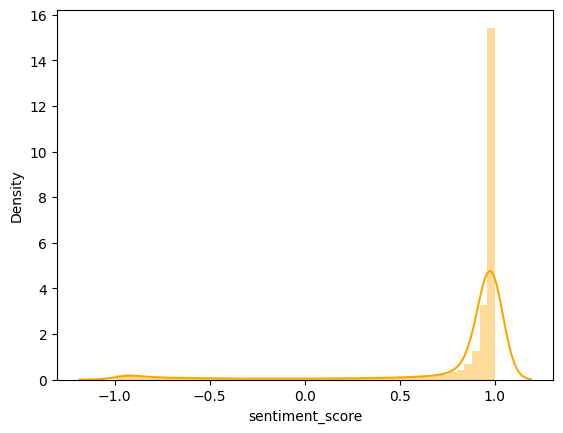

In [ ]:
# Polarity score visualization
sns.distplot(data['sentiment_score'], color='orange');

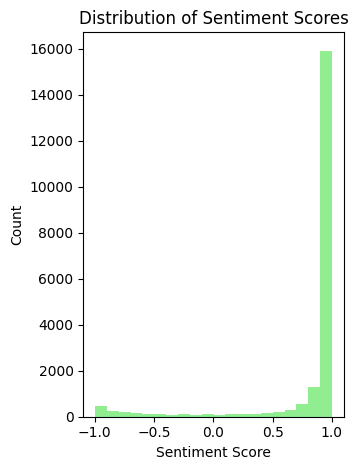

In [ ]:
# Plotting the distribution of sentiment scores
plt.subplot(1, 2, 2)
data['sentiment_score'].plot(kind='hist', bins=20, color='lightgreen')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#  Sentiment Analysis
data['Sentiment'] = data['Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative' if x <= 2 else 'Neutral')
data['Sentiment']

0        Positive
1        Negative
2         Neutral
3        Positive
4        Positive
           ...   
20486    Positive
20487    Positive
20488    Negative
20489    Negative
20490    Negative
Name: Sentiment, Length: 20491, dtype: object

In [ ]:
s_counts2 = data['Sentiment'].value_counts()
s_counts2

Positive    15093
Negative     3214
Neutral      2184
Name: Sentiment, dtype: int64

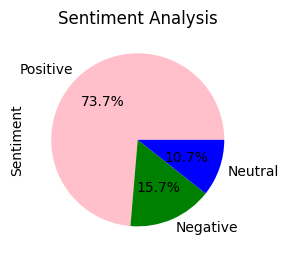

In [ ]:
#  Sentiment Analysis (Pie chart)
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 4)
data['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['Pink', 'green', 'blue'])
plt.title('Sentiment Analysis')
plt.tight_layout()
plt.show()

# Text Cleaning and Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def data_processing(text):
  # Removing emojis
  def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
  text=text.lower()                                                     #Converting the entire text in the reviews to lowercase
  text=re.sub(r"http\S+|www\S+|https\S+", '',text, flags= re.MULTILINE) #Removing url's
  text=re.sub(r'\S+@\S','',text)                                        #Removing the emails from reviews
  text=re.sub(r'\d+','',text)                                           #Removing the digits from reviews
  text=text.strip()                                                     #removing extra space from the reviews
  text=remove_emoji(text)                                               #Removing emojis
  text=re.sub(r'[^\w\s]','',text)                                       #remove all the punctuations from the reviews
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
data['Clean_Review']=data['Review'].apply(data_processing)

In [ ]:
data.head()

,Review,Rating,word_count,Length,sentiment_score,Sentiment,Clean_Review
0,nice hotel expensive parking got good deal sta...,4,87,593,0.9747,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,250,1689,0.9787,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,0.9889,Neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,89,600,0.9912,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,191,1281,0.9797,Positive,great stay great stay went seahawk game awesom...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def cleaning(text):
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

#lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [ ]:
data['Clean_Review']= data['Clean_Review'].apply(cleaning)

In [ ]:
data

,Review,Rating,word_count,Length,sentiment_score,Sentiment,Clean_Review
0,nice hotel expensive parking got good deal sta...,4,87,593,0.9747,Positive,nice hotel expensive park get good deal stay h...
1,ok nothing special charge diamond member hilto...,2,250,1689,0.9787,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,217,1427,0.9889,Neutral,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,89,600,0.9912,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,191,1281,0.9797,Positive,great stay great stay go seahawk game awesome ...
...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,109,733,0.9834,Positive,best keep secret rd time stay charm star ca nt...
20487,great location price view hotel great quick pl...,4,39,306,0.9753,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,63,443,0.2629,Negative,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,781,5557,0.9867,Negative,hotel theft ruin vacation hotel open sept gues...


In [ ]:
data['length'] = data['Clean_Review'].apply(len)

In [ ]:
original_length=data['Length'].sum()
new_length = data['length'].sum()

print('Total text length before cleaning: {}'.format(original_length))
print('Total text length after cleaning: {}'.format(new_length))

Total text length before cleaning: 14861007
Total text length after cleaning: 13375552


# Positive Sentiment

In [ ]:
pos_reviews=data[data.Sentiment=='Positive']
pos_reviews.head()

,Review,Rating,word_count,Length,sentiment_score,Sentiment,Clean_Review,length
0,nice hotel expensive parking got good deal sta...,4,87,593,0.9747,Positive,nice hotel expensive park get good deal stay h...,509
3,"unique, great stay, wonderful time hotel monac...",5,89,600,0.9912,Positive,unique great stay wonderful time hotel monaco ...,544
4,"great stay great stay, went seahawk game aweso...",5,191,1281,0.9797,Positive,great stay great stay go seahawk game awesome ...,1113
5,love monaco staff husband stayed hotel crazy w...,5,134,1002,0.9870,Positive,love monaco staff husband stay hotel crazy wee...,911
6,"cozy stay rainy city, husband spent 7 nights m...",5,101,748,0.9925,Positive,cozy stay rainy city husband spend nights mona...,665


# Negative Sentiment

In [ ]:
neg_reviews=data[data.Sentiment=='Negative']
neg_reviews.head()

,Review,Rating,word_count,Length,sentiment_score,Sentiment,Clean_Review,length
1,ok nothing special charge diamond member hilto...,2,250,1689,0.9787,Negative,ok nothing special charge diamond member hilto...,1518
10,"poor value stayed monaco seattle july, nice ho...",2,47,333,0.9666,Negative,poor value stay monaco seattle july nice hotel...,279
15,horrible customer service hotel stay february ...,1,214,1411,0.8496,Negative,horrible customer service hotel stay february ...,1240
16,disappointed say anticipating stay hotel monac...,2,242,1662,0.9905,Negative,disappoint say anticipate stay hotel monaco ba...,1475
24,great location need internally upgrade advanta...,2,35,250,0.9153,Negative,great location need internally upgrade advanta...,228


# Data Visulization

## Most Used Words

In [ ]:
# Review
mostUsedWords = data['Review'].str.split(expand=True).stack().value_counts()
mostUsedWords_top200 = mostUsedWords[:200]

fig = px.treemap(mostUsedWords_top200, path=[mostUsedWords_top200.index], values=0)
fig.update_layout(title_text='The 200 Most Frequest Words',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

## Word Cloud

#### Word cloud for  Reviews

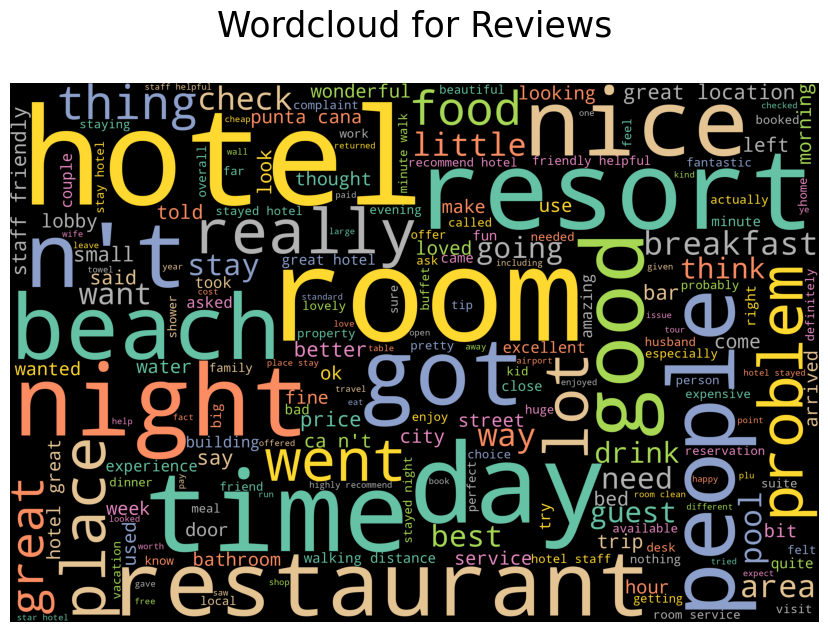

In [ ]:
all_reviews = ' '.join(data['Review'])
wordcloud = WordCloud(width=3000, height=2000,background_color='Black',colormap='Set2',random_state=42,max_font_size = 500 ).generate(all_reviews)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Wordcloud for Reviews", y=1.07, fontsize=25)
plt.show()

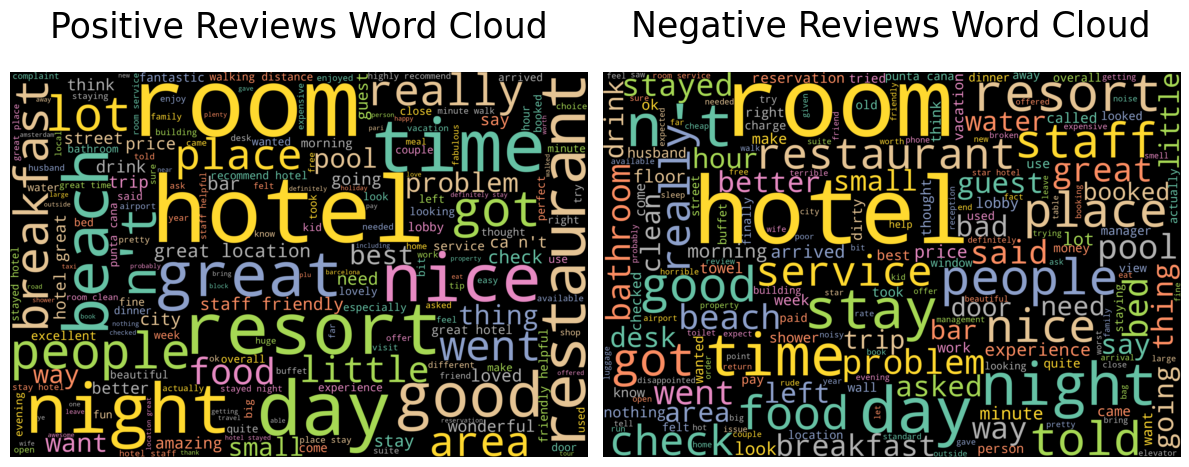

In [ ]:
#Positive wordCloud
text= ' '.join([word for word in pos_reviews['Review']])
pos_wordcloud = WordCloud(width=3000, height=2000, background_color='Black',colormap='Set2',random_state=42,max_font_size = 500).generate(text)


#Negative wordCloud
text= ' '.join([word for word in neg_reviews['Review']])
neg_wordcloud = WordCloud(width=3000, height=2000,background_color='Black',colormap='Set2',random_state=42,max_font_size = 500).generate(text)

# Visualizations
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(pos_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud',y=1.07, fontsize=25)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(neg_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud',y=1.07, fontsize=25)

plt.tight_layout()
plt.show()

In [ ]:
pos_reviews.Sentiment.replace("Positive",1,inplace=True)

In [ ]:
from collections import Counter
count=Counter()
for text in pos_reviews['Review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('hotel', 30969),
 ('room', 20095),
 ('not', 17415),
 ('great', 16165),
 ("n't", 12056),
 ('staff', 11488),
 ('good', 10795),
 ('just', 8969),
 ('did', 8519),
 ('stay', 8278),
 ('nice', 8163),
 ('rooms', 7578),
 ('stayed', 7550),
 ('location', 7494),
 ('breakfast', 6564)]

In [ ]:
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns=['word','count']
pos_words.head()

,word,count
0,hotel,30969
1,room,20095
2,not,17415
3,great,16165
4,n't,12056


In [ ]:
import plotly.express as px
px.bar(pos_words,x='count',y='word',title='Common words in positive reviews')

In [ ]:
neg_reviews.Sentiment.replace("Negative",2,inplace=True)

In [ ]:
from collections import Counter
count=Counter()
for text in neg_reviews['Review'].values:
  for word in text.split():
    count[word] +=1
count.most_common(15)

[('not', 8706),
 ('hotel', 6643),
 ('room', 6500),
 ("n't", 3872),
 ('no', 3467),
 ('did', 3041),
 ('staff', 2091),
 ('just', 2039),
 ('stay', 1999),
 ('rooms', 1996),
 ('good', 1829),
 ('service', 1735),
 ('like', 1635),
 ('night', 1613),
 ('day', 1567)]

In [ ]:
neg_words=pd.DataFrame(count.most_common(15))
neg_words.columns=['word','count']
neg_words.head()

,word,count
0,not,8706
1,hotel,6643
2,room,6500
3,n't,3872
4,no,3467


In [ ]:
px.bar(neg_words,x='count',y='word',title='Common words in negative reviews')

# Spliting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
X=data['Clean_Review']
Y=data['Sentiment']

# Word Embedding:
  + Tfidf Vectorizer
  + Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
X=vect.fit_transform(data['Clean_Review'])

In [ ]:
X

<20491x69598 sparse matrix of type '<class 'numpy.float64'>'
	with 1567372 stored elements in Compressed Sparse Row format>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("Size of x_train",(x_train.shape))
print("Size of x_test",(x_test.shape))
print("Size of y_train",(y_train.shape))
print("Size of y_test",(y_test.shape))


Size of x_train (16392, 69598)
Size of x_test (4099, 69598)
Size of y_train (16392,)
Size of y_test (4099,)


In [ ]:
labelEncoder=LabelEncoder()
y_train=labelEncoder.fit_transform(y_train)
y_test=labelEncoder.transform(y_test)

labels=labelEncoder.classes_.tolist()
print(labels)

['Negative', 'Neutral', 'Positive']


In [ ]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

# Handling imbalanced data
- We will have to handling the imbalanced data set by using SMOTE Technique

Text(0, 0.5, 'Count')

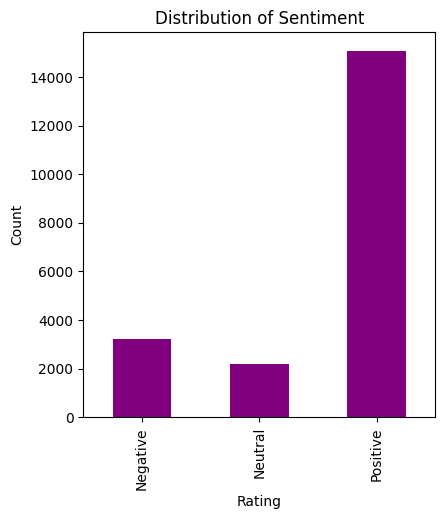

In [ ]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Sentiment'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')

In [ ]:
np.bincount(y_train)

array([ 2589,  1752, 12051])

# Logistic Regression Model

In [ ]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.56%


In [ ]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 465   36  124]
 [  84   70  278]
 [  35   35 2972]]


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       625
           1       0.50      0.16      0.24       432
           2       0.88      0.98      0.93      3042

    accuracy                           0.86      4099
   macro avg       0.72      0.63      0.65      4099
weighted avg       0.83      0.86      0.83      4099



# SMOTE Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
ros_X_train,ros_y_train=ros.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
print("Before sampling class distribution:",Counter(y_train))
print("After sampling class distribution:",Counter(ros_y_train))

Before sampling class distribution: Counter({2: 12051, 0: 2589, 1: 1752})
After sampling class distribution: Counter({2: 12051, 1: 12051, 0: 12051})


In [ ]:
np.bincount(ros_y_train)

array([12051, 12051, 12051])

In [ ]:
logistic_reg=LogisticRegression(random_state=0)
logistic_reg.fit(ros_X_train,ros_y_train)
logistic_reg_pred=logistic_reg.predict(x_test)
logistic_reg_acc=accuracy_score(logistic_reg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logistic_reg_acc*100))

Test accuracy: 83.34%


In [ ]:
print(confusion_matrix(y_test,logistic_reg_pred))
print("\n")
print(classification_report(y_test,logistic_reg_pred))

[[ 496   90   39]
 [ 103  206  123]
 [  77  251 2714]]


              precision    recall  f1-score   support

           0       0.73      0.79      0.76       625
           1       0.38      0.48      0.42       432
           2       0.94      0.89      0.92      3042

    accuracy                           0.83      4099
   macro avg       0.68      0.72      0.70      4099
weighted avg       0.85      0.83      0.84      4099



# MultinomialNB Model

In [ ]:
mnb=MultinomialNB()
mnb.fit(ros_X_train,ros_y_train)
mnb_pred=mnb.predict(x_test)
mnb_acc=accuracy_score(mnb_pred,y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 76.48%


In [ ]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test,mnb_pred))

[[ 491  121   13]
 [ 120  237   75]
 [ 167  468 2407]]


              precision    recall  f1-score   support

           0       0.63      0.79      0.70       625
           1       0.29      0.55      0.38       432
           2       0.96      0.79      0.87      3042

    accuracy                           0.76      4099
   macro avg       0.63      0.71      0.65      4099
weighted avg       0.84      0.76      0.79      4099



# SVC Model

In [ ]:
svc=LinearSVC()
svc.fit(ros_X_train,ros_y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 83.12%


In [ ]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 475   80   70]
 [ 107  146  179]
 [  66  190 2786]]


              precision    recall  f1-score   support

           0       0.73      0.76      0.75       625
           1       0.35      0.34      0.34       432
           2       0.92      0.92      0.92      3042

    accuracy                           0.83      4099
   macro avg       0.67      0.67      0.67      4099
weighted avg       0.83      0.83      0.83      4099



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rf.fit(ros_X_train,ros_y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_predi=rf.predict(x_test)

In [ ]:
rf_acc=accuracy_score(y_test,Y_predi)
rf_acc

0.8099536472310319

# Prediction on review


Labels=['Negative','Neutral','Positive']
+ Negative - 0
+ Neutral - 1
+ Positive - 2

In [ ]:
#Positive review
rev = ["nice place with good food and accomodation"]
rev_v =vect.transform(rev)
logreg.predict(rev_v)

array([2])

In [ ]:
#Neutral Review
rev = ["this chips are ok for health"]
rev_v =vect.transform(rev)
logreg.predict(rev_v)

array([1])

In [ ]:
#Negative Review
rev = ["this chips are bad for health"]
rev_v =vect.transform(rev)
logreg.predict(rev_v)

array([0])